Link to data source: https://www.kaggle.com/datasets/bobnau/daily-website-visitors

# Daily website visitors

* Number of website **visitors** for **5 years** of **daily**
* An academic teaching notes website whose alias is ***statforecasting.com***
* **Predict** future's number of website visitors

### Load the data

In [1]:
import pandas as pd

data_path = 'daily-website-visitors.csv'
data = pd.read_csv(data_path)
data

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499


##### Content
* **2167** rows of data
* From September 14, 2014, to August 19, 2020

##### Variables
* **`Page.Loads`**: daily counts of page loads
* **`Unique.Visits`**: daily counts of unique visitors - the sum of the counts of returning and first-time visitors
* **`First.Time.Visits`**: daily counts of first-time visitors
* **`Returning.Visits`**: daily counts of returning visitors

### Data preprocessing

In [2]:
# Convert Date into Datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Remove commas
data.replace(',', '', regex=True, inplace=True)

# Convert into int type
data['Page.Loads'] = data['Page.Loads'].astype(int)
data['Unique.Visits'] = data['Unique.Visits'].astype(int)
data['First.Time.Visits'] = data['First.Time.Visits'].astype(int)
data['Returning.Visits'] = data['Returning.Visits'].astype(int)

data.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,2014-09-14,2146,1582,1430,152
1,2,Monday,2,2014-09-15,3621,2528,2297,231
2,3,Tuesday,3,2014-09-16,3698,2630,2352,278
3,4,Wednesday,4,2014-09-17,3667,2614,2327,287
4,5,Thursday,5,2014-09-18,3316,2366,2130,236


### Bootstrapping function
Frequency distribution of **unique visitors** column
* Parameters:
  * **`n`**: bootstrap sample size
  * **`M`**: number of bootstrap samplings
  * **`x`**: confidence interval in %
* Returns:
  * sampling distribution
  * confidence interval

Confidence interval in 95%
Unique visits mean: 2944.9985699999997
Confidence interval: [2785.83, 3102.63]


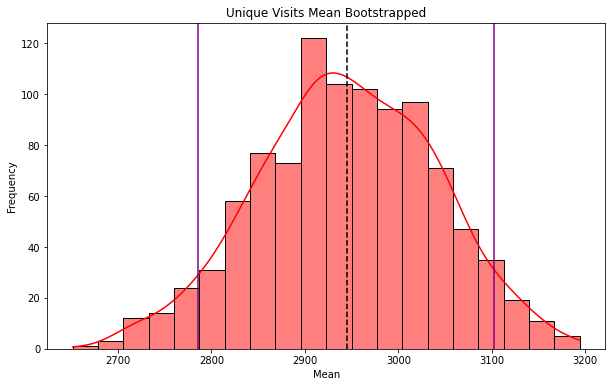

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def bootstrapping(n, M, x):
    mean_bootstrap = []

    # Make a bootstraped dataset of size M
    for _ in range(M):
        # Randomly select n rows from the original dataset
        samples_random = data.sample(n)
        # Calculate the mean of the bootstrapped dataset
        mean_samples = samples_random['Unique.Visits'].mean()
        # Append the mean to the list
        mean_bootstrap.append(mean_samples)

    # Calculate the mean of the bootstrapped dataset
    mean = sum(mean_bootstrap) / len(mean_bootstrap)

    # Compute the confidence interval of the mean
    alpha = 1-x
    mean_bootstrap.sort()
    lower_bound = mean_bootstrap[int(alpha * M)]
    upper_bound = mean_bootstrap[int((1 - alpha) * M)]
    print(f'Confidence interval in {int(100*x)}%')
    print(f'Unique visits mean: {mean}')
    print(f'Confidence interval: [{lower_bound}, {upper_bound}]')

    # Plot the bootstrapped mean
    plt.figure(figsize=(10, 6))
    fig = sns.histplot(mean_bootstrap, kde=True, bins=20, color='red')
    plt.axvline(lower_bound, color='purple')
    plt.axvline(upper_bound, color='purple')
    plt.axvline(mean, color='black', linestyle='dashed')
    plt.title('Unique Visits Mean Bootstrapped')
    fig.set_xlabel('Mean')
    fig.set_ylabel('Frequency')
    plt.show()

bootstrapping(100, 1000, 0.95)

### Visualizing the page loads and visits over time series

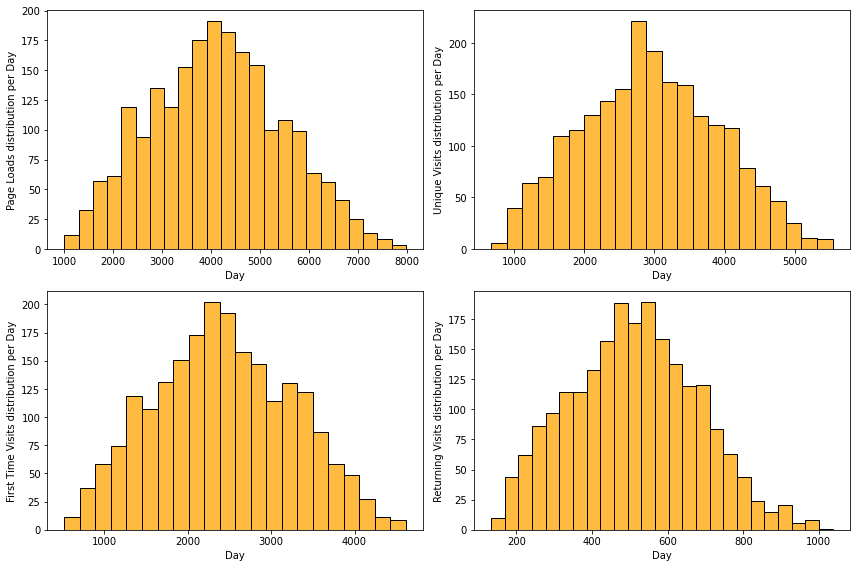

In [4]:
# Frequency distribution of each continuous column
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(2, 2, 1)
ax1 = sns.histplot(x='Page.Loads', data=data, color='orange')
ax1.set_xlabel('Day')
ax1.set_ylabel('Page Loads distribution per Day')

ax2 = plt.subplot(2, 2, 2)
ax2 = sns.histplot(x='Unique.Visits', data=data, color='orange')
ax2.set_xlabel('Day')
ax2.set_ylabel('Unique Visits distribution per Day')

ax3 = plt.subplot(2, 2, 3)
ax3 = sns.histplot(x='First.Time.Visits', data=data, color='orange')
ax3.set_xlabel('Day')
ax3.set_ylabel('First Time Visits distribution per Day')

ax4 = plt.subplot(2, 2, 4)
ax4 = sns.histplot(x='Returning.Visits', data=data, color='orange')
ax4.set_xlabel('Day')
ax4.set_ylabel('Returning Visits distribution per Day')

plt.tight_layout()
plt.show()

> Page.Loads Distribution is skewed towards right
> 
> Unique.Visits Distribution is skewed towards right
> 
> First.Time.Visits Distribution is skewed towards left
> 
> Returning.Visits Distribution is skewed towards left

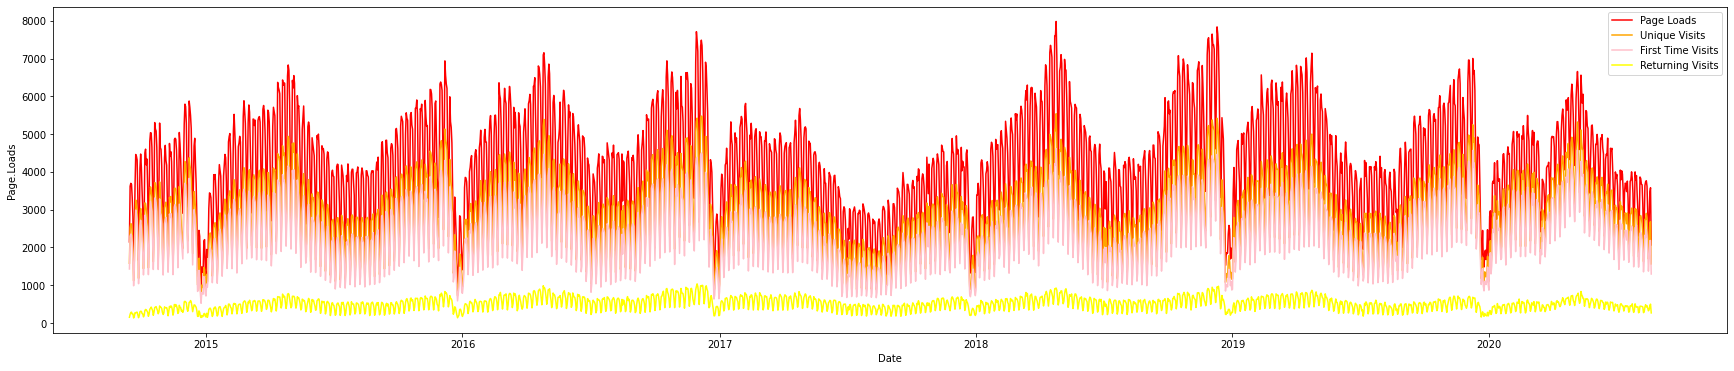

In [5]:
# Plot Page Loads & Visits over time series
plt.figure(figsize=(30, 6))
fig = sns.lineplot(x='Date', y='Page.Loads', data=data, color='red', label='Page Loads')
fig = sns.lineplot(x='Date', y='Unique.Visits', data=data, color='orange', label='Unique Visits')
fig = sns.lineplot(x='Date', y='First.Time.Visits', data=data, color='pink', label='First Time Visits')
fig = sns.lineplot(x='Date', y='Returning.Visits', data=data, color='yellow', label='Returning Visits')
plt.show()

> Page loads and Visits have a **constant fluctuation**
> 
> They have been **correlated** to each other
> 
> The data increases high at the beginning of each year, then falls slightly and then rises again, finally falling high at the ending
> 
> The number of students who visit the academic website tends to increase highly during the school year, decrease around the middle of the year, and have a very low frequency at the end of the year.

In [6]:
# Plot scatter matrix show the paired relationships between the variables
import plotly.express as px

px.scatter_matrix(data, dimensions=['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits'])

> Paired relationships represent linear correlation
> 
> **Unique visits** and **First visits** have a straight upward line
> 
> **First visits** are increasing as the **Unique visits** increase
> 
> Identify their level of correlation visually

### Average Value Counts per day

In [7]:
# Group the data by day
data_group_by_day = data.groupby('Day')

In [8]:
data_average_day = data_group_by_day.mean().reset_index().drop(['Row', 'Day.Of.Week'], axis=1)
data_average_day

,Day,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,Friday,3719.860841,2646.770227,2164.417476,482.352751
1,Monday,4845.680645,3458.425806,2858.180645,600.245161
2,Saturday,2501.025890,1786.747573,1477.181230,309.566343
3,Sunday,3246.980645,2341.270968,1949.025806,392.245161
4,Thursday,4651.355987,3327.553398,2747.317152,580.236246
5,Tuesday,4955.335484,3539.293548,2928.232258,611.061290
6,Wednesday,4893.916129,3502.012903,2895.490323,606.522581


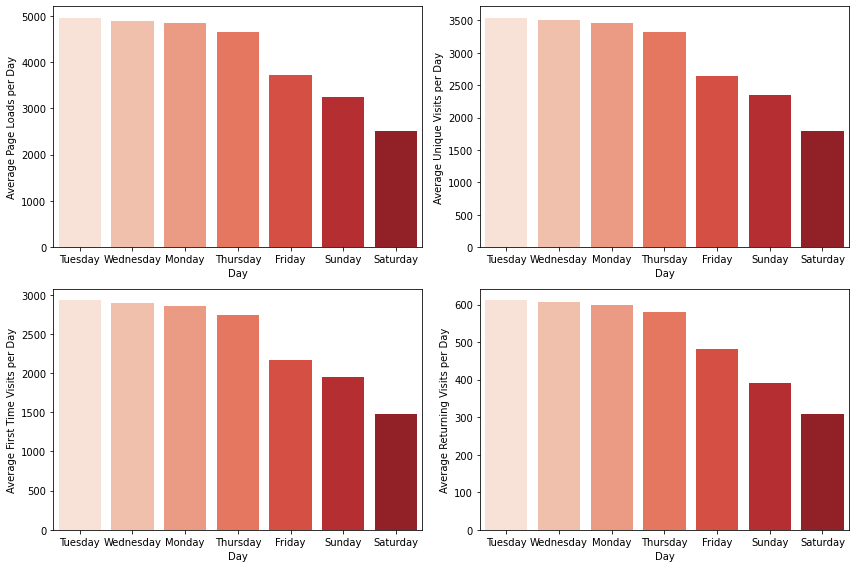

In [9]:
# Plot the Bargraph for every average per day
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(2, 2, 1)
ax1 = sns.barplot(x='Day', y='Page.Loads', data=data_average_day.sort_values(by='Page.Loads', ascending=False), palette='Reds')
ax1.set_xlabel('Day')
ax1.set_ylabel('Average Page Loads per Day')

ax2 = plt.subplot(2, 2, 2)
ax2 = sns.barplot(x='Day', y='Unique.Visits', data=data_average_day.sort_values(by='Unique.Visits', ascending=False), palette='Reds')
ax2.set_xlabel('Day')
ax2.set_ylabel('Average Unique Visits per Day')

ax3 = plt.subplot(2, 2, 3)
ax3 = sns.barplot(x='Day', y='First.Time.Visits', data=data_average_day.sort_values(by='First.Time.Visits', ascending=False), palette='Reds')
ax3.set_xlabel('Day')
ax3.set_ylabel('Average First Time Visits per Day')

ax4 = plt.subplot(2, 2, 4)
ax4 = sns.barplot(x='Day', y='Returning.Visits', data=data_average_day.sort_values(by='Returning.Visits', ascending=False), palette='Reds')
ax4.set_xlabel('Day')
ax4.set_ylabel('Average Returning Visits per Day')

plt.tight_layout()
plt.show()

> The days which have the most visits are **Tuesday**, **Wednesday**, **Monday**, **Thursday**.
> 
> The least visits are on **Friday**, **Sunday** and **Saturday**.
> 
> Weekdays are more visited than weekends.
> 
> => Students usually visit academic websites on weekdays, and less on weekends.

> The features in this dataset have the similar trend. 
> 
> => Analyzing **time series data** to explore more deeper about the **evolution** of data over time and use it to make **predictions** about future data

### Linear Regression model

In [10]:
data_to_predict = data[['Unique.Visits', 'Date', 'Day', 'Day.Of.Week']]

# Convert datetime to int and divide by 100000000000
data_to_predict['Date'] = data_to_predict['Date'].astype('int64') // 100000000000

data_to_predict.head()

,Unique.Visits,Date,Day,Day.Of.Week
0,1582,14106528,Sunday,1
1,2528,14107392,Monday,2
2,2630,14108256,Tuesday,3
3,2614,14109120,Wednesday,4
4,2366,14109984,Thursday,5


##### Create a feature **`Is.Frequent`** which has 2 values:
* **1**: The days when the website received the most visits (*Monday*, *Tuesday*, *Wednesday*, *Thursday*)
* **0**: The days when the website received the least visits (*Friday*, *Saturday*, *Sunday*)

In [11]:
import numpy as np

data_to_predict['Is.Frequent'] = np.where((data_to_predict['Day'] == 'Monday') |
                                          (data_to_predict['Day'] == 'Tuesday') |
                                          (data_to_predict['Day'] == 'Wednesday') |
                                          (data_to_predict['Day'] == 'Thursday'), 1, 0)
data_to_predict.drop(['Day'], axis=1, inplace=True)

data_to_predict

,Unique.Visits,Date,Day.Of.Week,Is.Frequent
0,1582,14106528,1,0
1,2528,14107392,2,1
2,2630,14108256,3,1
3,2614,14109120,4,1
4,2366,14109984,5,1
...,...,...,...,...
2162,1696,15974496,7,0
2163,2037,15975360,1,0
2164,2638,15976224,2,1
2165,2683,15977088,3,1


##### Separate the variables

In [12]:
x = data_to_predict[['Date', 'Day.Of.Week', 'Is.Frequent']]
y = data_to_predict['Unique.Visits']

##### Split dataset into train and test samples

In [13]:
# split dataset into train and test samples
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##### Train the model

In [14]:
# train the model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept=False, normalize=True)
regressor.fit(x_train, y_train)

y_predict = regressor.predict(x_test)

linear_regression = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
linear_regression.head()

,Actual,Predicted
1486,4173,3533.171651
1602,1902,2233.121283
1460,2870,3446.746980
1134,2142,2415.567230
1513,4329,3578.353937


##### Score of the model

In [15]:
print(f'Score of the model: {regressor.score(x_train, y_train)*100}%')

Score of the model: 38.583229804634435%


##### Visualize the actual and predicted values

<AxesSubplot:>

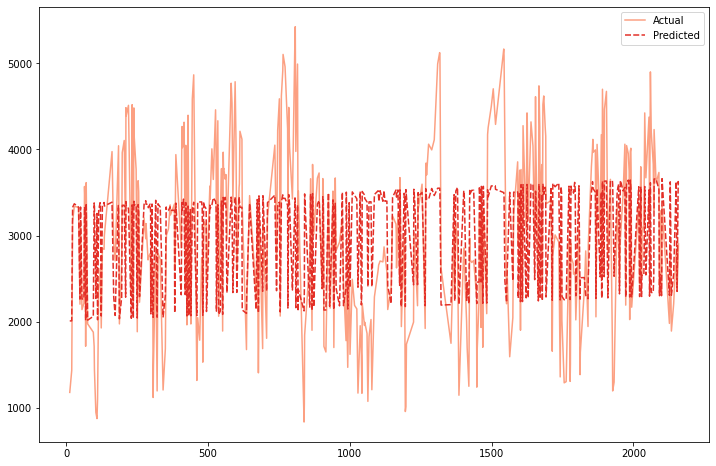

In [16]:
# Visualize the results
plt.figure(figsize=(12, 8))
sns.lineplot(data=linear_regression, palette='Reds')

# Conclusion
* **Results**:
  * students tend to study a lot on weekdays, and the begin of the year
  * students are less self-study on weekends, and at the end of the year
* **The dataset**:
  * has features that tend to be similar
  * type of time series data with clear cycles, seasons, and trends
  * can be used to predict future data
* **The prediction method**:
  * Prediction data is numerical, it is difficult to be precise
  * time information has not been processed yet, so the results are not accurate